# Let's work with some forest fire data.

Quick import of the data and columns name creation.

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
#Read in the data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

#Create the columns
df.columns = ['X','Y','Month','Day','FFMC','DMC','DC','ISI','Temp','RH', 'Wind', 'Rain', 'Area']



    1. X - x-axis spatial coordinate
    2. Y - y-axis spatial coordinate
    3. month - month of the year
    4. day - day of the week: "mon" to "sun"
    5. FFMC - FFMC index from the FWI system
    6. DMC - DMC index from the FWI system
    7. DC - DC index from the FWI system
    8. ISI - ISI index from the FWI system
    9. temp - temperature in Celsius degrees
    10. RH - relative humidity in %
    11. wind - wind speed in km/h
    12. rain - outside rain in mm/m2
    13. area - the burned area of the forest (in ha)
    
For more information about the Fire Weather Index (FWI) please visit [here](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)

This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 


# Descriptive statistics

### 1) Show an overview of the data, speciafically show the data type and the number of non-null values in each column. Also show the mean, std and quantiles of the Area column. What do the quantiles tell you about the burn area of forest fires ?

In [222]:
# Displaying the data type, the number of non_null values in each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   Month   517 non-null    object 
 3   Day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   Temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  Wind    517 non-null    float64
 11  Rain    517 non-null    float64
 12  Area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [223]:
# Displaying the Mean, STD quantiles of the area column
df['Area'].describe()

# The quartiels tell me that the data is skewed to the Right

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: Area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

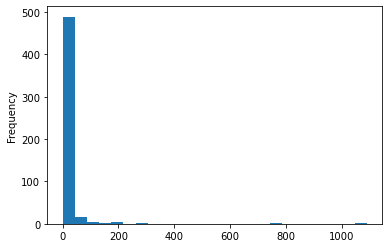

In [224]:
df['Area'].plot.hist(bins=25)

### 2) Show the 5 months that have the largest burn area of the forest on average. Based on the result, is the park in the northern or southern hemisphere ?

In [225]:

# Displaying the 5 months that have the largest burn area of the forrest on average
df.groupby(['Month'])['Area'].mean().to_frame().sort_values('Area', ascending=False).head(5)

# I do not know off of these results if the park is in the northn or southern hemosphere
# May sep jul dec and aug are a pretty good spread acrose the year...

,Area
Month,
may,19.240000
sep,17.942616
jul,14.369687
dec,13.330000
aug,12.489076


### Show the number of data points available for each month in the data set. Knowing that data points are collected when there is a fire, does it support your answer ?

In [226]:
df.groupby(['Month']).count()

# Knowing the data points are collected when there is a fire does not support my answer. Because I gave a non-answer. Now seeing that
# There are more data points surrounding Sept and Aug, I am guessing this is in the northern hemosphere. Just because there are a lot of fires in colorado in these times
# I have no clue when there are fires in the southern hemisphere. 


,X,Y,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
Month,,,,,,,,,,,,
apr,9,9,9,9,9,9,9,9,9,9,9,9
aug,184,184,184,184,184,184,184,184,184,184,184,184
dec,9,9,9,9,9,9,9,9,9,9,9,9
feb,20,20,20,20,20,20,20,20,20,20,20,20
jan,2,2,2,2,2,2,2,2,2,2,2,2
jul,32,32,32,32,32,32,32,32,32,32,32,32
jun,17,17,17,17,17,17,17,17,17,17,17,17
mar,54,54,54,54,54,54,54,54,54,54,54,54
may,2,2,2,2,2,2,2,2,2,2,2,2


### 3) Create two summary statistics tables : 
#### -The first table use : Area, Rain, Relative Humidity (RH), Temperature and Wind. 
#### -The second use : Area, FFMC, DMC, DC and ISI

#### Calculate the total, average and standard deviation for 'Area' and calculate the average for everthing else.

#### Map the months of the year to their numerical representation so that the data will be shown chronologically for the year, rathern than ordered alphabetically on the months

In [227]:
# Creatind DF1 for stats1
df_stat1 = df[['Area', 'Rain', 'RH', 'Temp', 'Wind']]
df_stat1.describe()


,Area,Rain,RH,Temp,Wind
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,12.847292,0.021663,44.288201,18.889168,4.017602
std,63.655818,0.295959,16.317469,5.806625,1.791653
min,0.000000,0.000000,15.000000,2.200000,0.400000
25%,0.000000,0.000000,33.000000,15.500000,2.700000
50%,0.520000,0.000000,42.000000,19.300000,4.000000
75%,6.570000,0.000000,53.000000,22.800000,4.900000
max,1090.840000,6.400000,100.000000,33.300000,9.400000


In [228]:
# Creating DF2 for stats
df_stat2 = df[['Area', 'FFMC', 'DMC', 'DC', 'ISI']]
df_stat2.describe()

,Area,FFMC,DMC,DC,ISI
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,12.847292,90.644681,110.872340,547.940039,9.021663
std,63.655818,5.520111,64.046482,248.066192,4.559477
min,0.000000,18.700000,1.100000,7.900000,0.000000
25%,0.000000,90.200000,68.600000,437.700000,6.500000
50%,0.520000,91.600000,108.300000,664.200000,8.400000
75%,6.570000,92.900000,142.400000,713.900000,10.800000
max,1090.840000,96.200000,291.300000,860.600000,56.100000


In [229]:
 # Mapping months on the DF to numerical value then sorting
 df['Month'] = pd.to_datetime(df.Month, format='%b').dt.month
 df.sort_values('Month', inplace=True)


### 4) Which of the columns seem to correlate best with the area of burned forest ? Why ?

<AxesSubplot:>

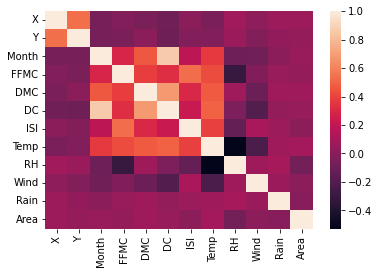

In [230]:
import seaborn as sns
sns.heatmap(df.corr())

# Relative Humidity has the highest correlation with the area of the burned forest. When things are more dry they are more likely to burn.



# Visualization

### 5) Visualize the Area burnt by month

<AxesSubplot:xlabel='Month'>

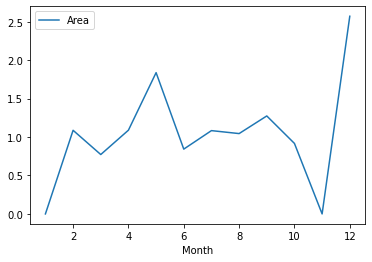

In [237]:
df1 = df.groupby(['Month'])['Area'].mean().to_frame().sort_values('Month', ascending=False).copy()
# sns.scatterplot(data=df1.groupby('Month')['Area'].sum(), x='Month', y='Area')
# plt.show()
df1.plot()

The plot that you obtained is most likely underwhelming.... Most data points are squished near the value 0 for Area. To fix this, we must change the scale of the values in the Area column and we'll be using a logarithmic scale. 

Before you apply the logarithmic scale you will need to add a value of 1 to the Area column (this will avoid creating -inf values since the log function has a vertical asymptote at 0). You will also need apply() and the numpy log function.

Once you have rescaled the Area data, please replot the same graph you did above and you should have a better 'spread of your data.

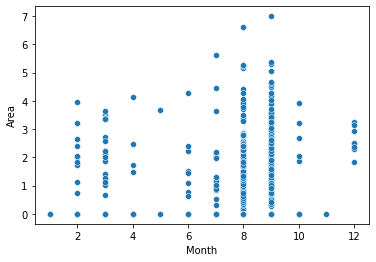

In [232]:
df['Area'] = df['Area']+1
df['Area'] = np.log(df['Area'])
sns.scatterplot(data=df, x='Month', y='Area')
plt.show()

### 6) Show the histogram of the Area variable. How does this histogram support your answer relating to the quantiles ?

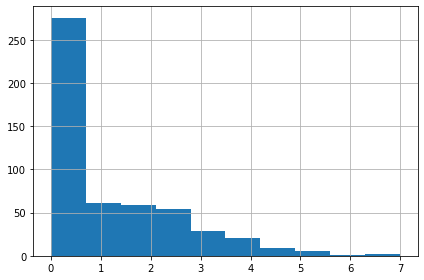

In [233]:
df['Area'].hist()
plt.tight_layout()
plt.show()


### 7) Plot the relational plot between Area and the variables you chose in question 4. Comment on the relationship between the variables you chose and Area